              Population
Year                    
1800-01-01  6.000000e+07
1801-01-01  5.933333e+07
1802-01-01  5.866667e+07
1803-01-01  5.800000e+07
1804-01-01  5.733333e+07


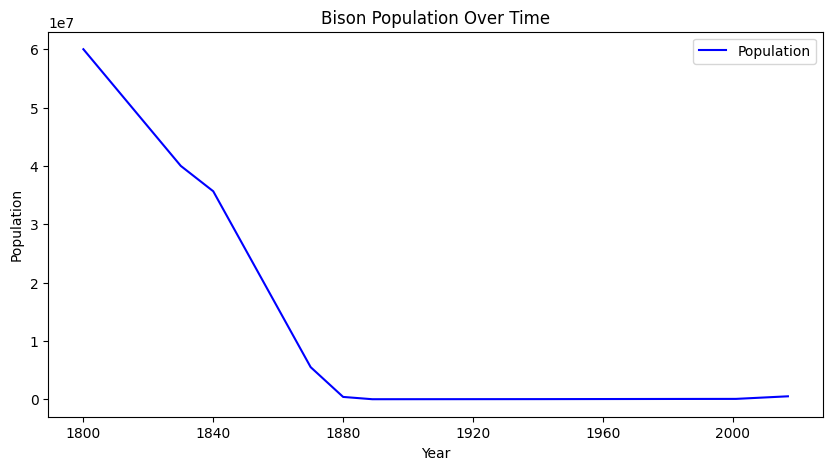

In [6]:
# Block A1 – Dataset Prep

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r"E:\file_main\Major_1\fauna-forecast\data\raw\bison_population_interpolated.csv"
df = pd.read_csv(file_path)

# Ensure correct datatypes
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Convert year to datetime
df.set_index('Year', inplace=True)

# Preview
print(df.head())

# Plot raw population data
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Population'], label='Population', color='blue')
plt.title("Bison Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()


In [7]:
# Block A2 – Stationarity Check

from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
result = adfuller(df['Population'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

# Interpretation
if result[1] <= 0.05:
    print("✅ Series is stationary (p <= 0.05)")
else:
    print("❌ Series is non-stationary (p > 0.05) – Differencing needed")


ADF Statistic: -2.6553955732294074
p-value: 0.08207988161793345
Critical Value (1%): -3.4609922013325267
Critical Value (5%): -2.875015740963014
Critical Value (10%): -2.5739524288408777
❌ Series is non-stationary (p > 0.05) – Differencing needed


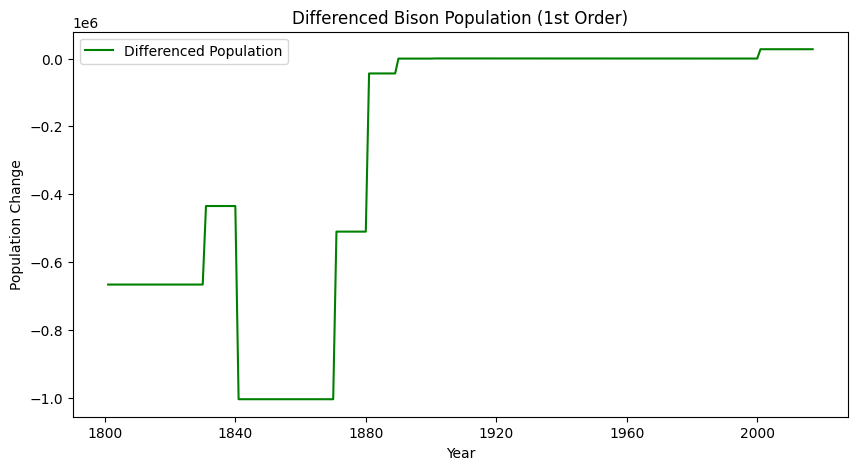

ADF Statistic (after differencing): -1.2849201090845734
p-value: 0.636042834443638
Critical Value (1%): -3.4609922013325267
Critical Value (5%): -2.875015740963014
Critical Value (10%): -2.5739524288408777
❌ Still non-stationary, consider 2nd differencing


In [11]:
# Block A3 – Differencing for Stationarity

# First-order differencing
df_diff = df['Population'].diff().dropna()

# Plot differenced data
plt.figure(figsize=(10,5))
plt.plot(df_diff, label="Differenced Population", color="green")
plt.title("Differenced Bison Population (1st Order)")
plt.xlabel("Year")
plt.ylabel("Population Change")
plt.legend()
plt.show()

# Re-run ADF test
result_diff = adfuller(df_diff)
print("ADF Statistic (after differencing):", result_diff[0])
print("p-value:", result_diff[1])
for key, value in result_diff[4].items():
    print(f"Critical Value ({key}): {value}")

# Interpretation
if result_diff[1] <= 0.05:
    print("✅ Series is stationary after differencing")
else:
    print("❌ Still non-stationary, consider 2nd differencing")


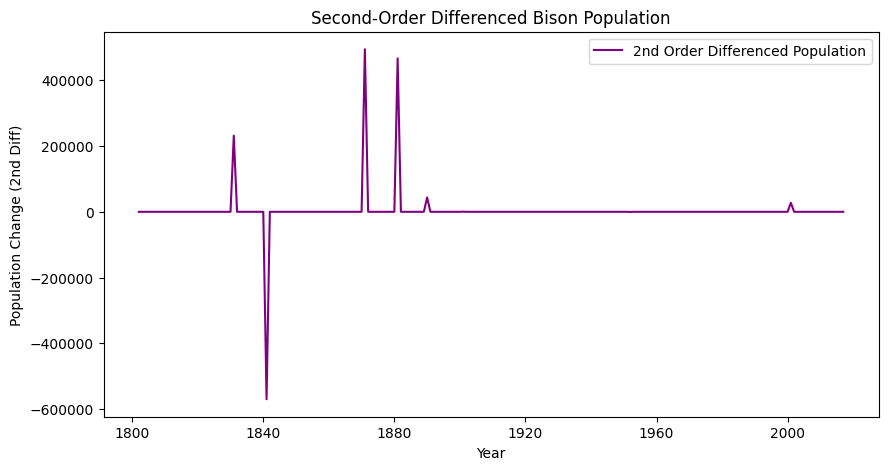

ADF Statistic (2nd order): -14.633467384356736
p-value: 3.720166740328115e-27
Critical Value (1%): -3.461136478222043
Critical Value (5%): -2.875078880098608
Critical Value (10%): -2.5739861168199027
✅ Series is stationary after 2nd differencing (d=2)


In [12]:
# Block A4 – Second-Order Differencing

# Second-order differencing
df_diff2 = df['Population'].diff().diff().dropna()

# Plot 2nd differenced data
plt.figure(figsize=(10,5))
plt.plot(df_diff2, label="2nd Order Differenced Population", color="purple")
plt.title("Second-Order Differenced Bison Population")
plt.xlabel("Year")
plt.ylabel("Population Change (2nd Diff)")
plt.legend()
plt.show()

# Re-run ADF test on 2nd differenced data
result_diff2 = adfuller(df_diff2)
print("ADF Statistic (2nd order):", result_diff2[0])
print("p-value:", result_diff2[1])
for key, value in result_diff2[4].items():
    print(f"Critical Value ({key}): {value}")

# Interpretation
if result_diff2[1] <= 0.05:
    print("✅ Series is stationary after 2nd differencing (d=2)")
else:
    print("❌ Still non-stationary – further investigation needed")
